<a href="https://colab.research.google.com/github/Freedisch/bitcoin-market-price/blob/main/Bitcoin_Market_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
from keras.regularizers import l1
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [4]:
file_path = 'BTC-USD3.csv'
data = pd.read_csv(file_path)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-28,23521.837891,23585.384766,23077.650391,23147.353516,23147.353516,20535363434
1,2023-03-01,23150.929688,23880.632813,23088.626953,23646.550781,23646.550781,24662841200
2,2023-03-02,23647.019531,23739.138672,23245.021484,23475.466797,23475.466797,20386398516
3,2023-03-03,23476.632813,23479.347656,22213.238281,22362.679688,22362.679688,26062404610
4,2023-03-04,22362.923828,22405.177734,22198.980469,22353.349609,22353.349609,11166012913


# ML Model Without Optmization Techniques

In [5]:

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# We will use the 'Close' price as our target variable
target = data['Close'].values

# For simplicity, let's use only 'Close' price as our input feature for now
features = data[['Close']].values

# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
features_normalized = scaler.fit_transform(features)

# Define a function to create the dataset with a window of previous days' prices
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Generate the dataset with a window size (look_back) of 5 days
look_back = 5
X, y = create_dataset(features_normalized, look_back)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_train.shape, X_test.shape


((288, 5, 1), (72, 5, 1))

In [19]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test, verbose=0)

test_loss

0.08676866441965103

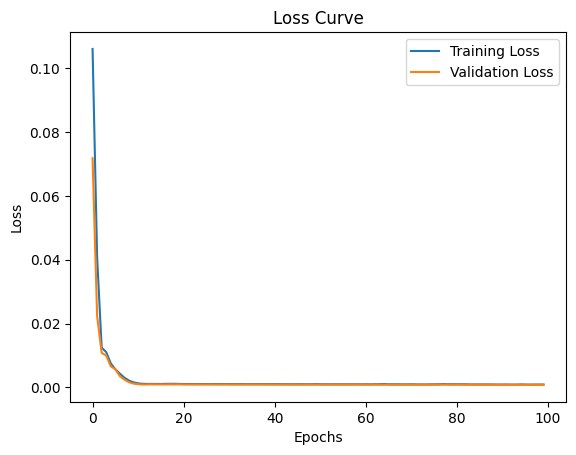

In [10]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss curve
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

In [17]:
# Predict the prices
predicted_prices = model.predict(X_test)

# Invert normalization for a true performance measure
predicted_prices_inv = scaler.inverse_transform(predicted_prices)
actual_prices_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MSE
mse = mean_squared_error(actual_prices_inv, predicted_prices_inv)
print(f"Test MSE: {mse}")


7/7 [==============================] - 0s 1ms/step
Test MSE: 153018677.42696476


# L1 Regularization

Epoch 1/100
25/25 [==============================] - 2s 26ms/step - loss: 0.3739 - val_loss: 0.2546
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.2249 - val_loss: 0.2055
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1866 - val_loss: 0.1730
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1568 - val_loss: 0.1460
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1332 - val_loss: 0.1244
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1167 - val_loss: 0.1100
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1053 - val_loss: 0.1044
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0999 - val_loss: 0.0994
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0965 - val_loss: 0.0965
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0941 - val_loss: 0.0949
Epoch 11

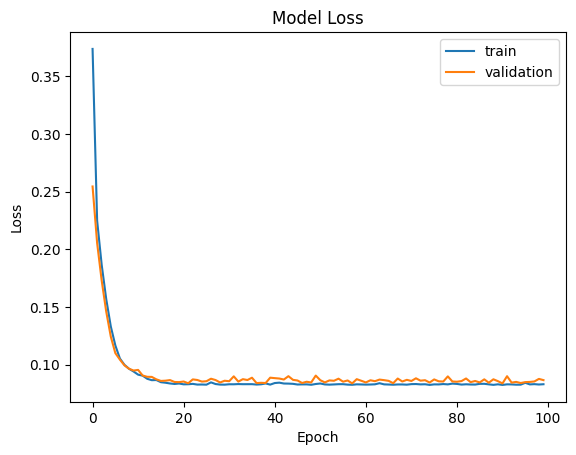

In [14]:
# Sample data preprocessing
look_back = 5
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

features_normalized = np.random.rand(1000, 1)  # Placeholder for normalized features
X, y = create_dataset(features_normalized, look_back)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [20]:
# LSTM model with L1 regularization
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1), kernel_regularizer=l1(0.01)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate model
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {test_loss}')

Epoch 1/100
25/25 [==============================] - 2s 18ms/step - loss: 0.4000 - val_loss: 0.2333
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2119 - val_loss: 0.1890
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1795 - val_loss: 0.1606
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1534 - val_loss: 0.1404
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1338 - val_loss: 0.1227
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1195 - val_loss: 0.1113
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1114 - val_loss: 0.1060
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1073 - val_loss: 0.1027
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1041 - val_loss: 0.1001
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1015 - val_loss: 0.0976
Epoch 11

In [ ]:
# Plotting the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# L2 Regularization Model

Epoch 1/100
25/25 [==============================] - 2s 18ms/step - loss: 0.2080 - val_loss: 0.1173
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.1031 - val_loss: 0.1112
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0972 - val_loss: 0.1069
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0941 - val_loss: 0.1035
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0914 - val_loss: 0.1012
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0898 - val_loss: 0.0991
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0883 - val_loss: 0.0977
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0875 - val_loss: 0.0963
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0866 - val_loss: 0.0954
Epoch 10/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0860 - val_loss: 0.0946
Epoch 11

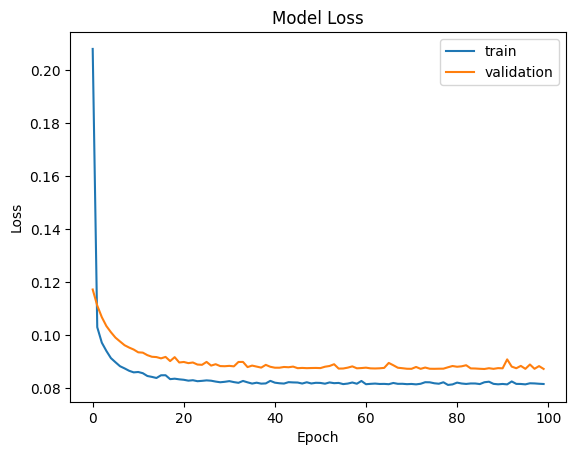

In [15]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data preprocessing steps should be the same as for the L1 example
look_back = 5
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

features_normalized = np.random.rand(1000, 1)  # Placeholder for normalized features
X, y = create_dataset(features_normalized, look_back)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model with L2 regularization
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1), kernel_regularizer=l2(0.01)))  # Using L2 regularization
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {test_loss}')

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# Convolutional Neural Network

Epoch 1/100
25/25 [==============================] - 1s 6ms/step - loss: 0.1475 - val_loss: 0.0980
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0974 - val_loss: 0.0958
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0969 - val_loss: 0.0929
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0933 - val_loss: 0.0902
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0920 - val_loss: 0.0893
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0907 - val_loss: 0.0877
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0901 - val_loss: 0.0900
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0895 - val_loss: 0.0883
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0889 - val_loss: 0.0865
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0883 - val_loss: 0.0875
Epoch 11/

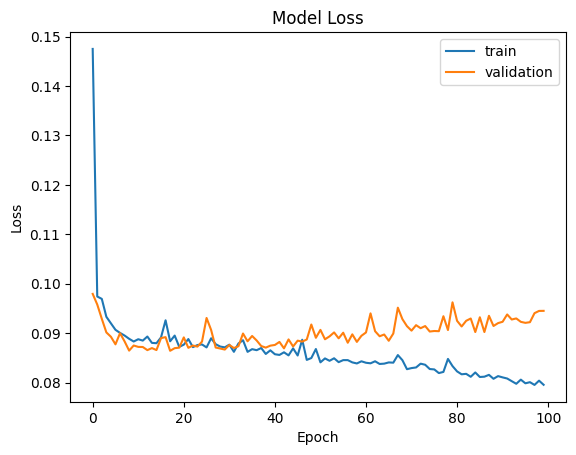

In [16]:
look_back = 5
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

features_normalized = np.random.rand(1000, 1)  # Placeholder for your normalized features
X, y = create_dataset(features_normalized, look_back)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(look_back, 1)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {test_loss}')

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
